![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO PLOT A HEATMAP OF RETURNS FROM MULTIPLE ASSETS**

## **Plot a heatmap for financial assets**

<font size="3"> In a previous <a href="https://quant-trading.co/how-to-plot-cumulative-returns-for-multiple-assets/" target="_blank">notebook</a>, we showed how to plot cumulative returns for different assets.  Now we will show how to make a different chart: a Heatmap. A heat map is a way to represent data points in a data set in a visual manner. All heat maps share one thing in common -- they use different colors or different shades of the same color to represent different values and to communicate the relationships that may exist between the variables plotted on the x-axis and y-axis. Usually, a darker color or shade represents a higher or greater quantity of the value being represented in the heat map. So, now we will show how to plot a heatmap of returns from multiple financial assets. 
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf  #Yahoo Finance
from  matplotlib.colors import LinearSegmentedColormap

## **Define some parameters for the calculations and the charts**

<font size="3"> We will define a set of parameters: a) The dates we would like to work with, b) The assets we will track the prices to get the returns, c) The names we will give to our asset's, in case people are not familiar with the stock's symbol
<br><br>

In [2]:
#DATES
start = datetime.datetime(2003, 12, 31)
end = datetime.datetime(2023, 12, 31)

#ASSETS
#Magnificent 7 stocks
tickers = ['AAPL','GOOG','META','MSFT','NVDA','AMZN','TSLA']
alias = ['Apple', 'Google', 'Meta', 'Microsoft', 'Nvidia', 'Amazon', 'Tesla']

## **Create a dictionary of DataFrames to store the information from the stocks**

   
<font size="3"> An easy way to store the information from a set of different stocks is using a dictionary of DataFrames. You will have the ticker of each stock as the Dictionary's key. <font size="3"> In a previous <a href="https://quant-trading.co/how-to-plot-cumulative-returns-for-multiple-assets/" target="_blank">notebook</a>, we showed how to do that step by step. We also explained how to transform the DataFrame from daily observations to yearly observations. That would be a great way to simplified the total return calculations for an entire year. If you need to refresh how to do that please look <a href="https://quant-trading.co/mean-and-median-return-calculations-using-python/" target="_blank">here</a>     
<br><br>

In [4]:
#CREATE DICTIONARY TO STORE DATAFRAMES

DataFrameDict = {elem : pd.DataFrame() for elem in tickers}
for key in DataFrameDict.keys():
    prices = yf.Ticker(key)
    prices_hist = prices.history(period="max")
    prices_hist['Dividends'].iloc[-1]=0
    prices_hist['perc_Dividends']=prices_hist['Dividends']/prices_hist['Close']
    prices_hist['ret'] = prices_hist['Close']/ prices_hist['Close'].shift(1)-1+prices_hist['perc_Dividends']
    prices_hist['cum_ret']=(1 + prices_hist['ret']).cumprod()
    prices_hist['AdjClose']= 100*prices_hist['cum_ret']      #calculate an adjusted price to include dividends
    prices_hist['AdjClose'].iloc[0]=100    
    prices_hist_anual = prices_hist.resample('Y')          #resample the DataFrame to calculate yearly returns
    prices_hist_anual = prices_hist_anual.apply(lambda x : x.iloc[-1])
    prices_hist_anual.reset_index(inplace=True)
    prices_hist_anual['Date'] = pd.to_datetime(prices_hist_anual['Date'], utc=True).dt.date  
    prices_hist_anual['Date'] = pd.to_datetime(prices_hist_anual['Date'])
    prices_hist_anual = prices_hist_anual.loc[(prices_hist_anual['Date'] >=start)&(prices_hist_anual['Date'] <= end)]
    DataFrameDict[key] = prices_hist_anual[:]        
    DataFrameDict[key]['ret'+key] = DataFrameDict[key]['AdjClose']/ DataFrameDict[key]['AdjClose'].shift(1)-1    
    DataFrameDict[key].reset_index(inplace=True)  
    
DataFrameDict

{'AAPL':     index       Date        Open        High         Low       Close  \
 0      23 2003-12-31    0.322766    0.325487    0.320196    0.323068   
 1      24 2004-12-31    0.980997    0.982660    0.967996    0.973589   
 2      25 2005-12-31    2.144013    2.189972    2.126779    2.173645   
 3      26 2006-12-31    2.538286    2.582128    2.520447    2.565196   
 4      27 2007-12-31    6.032021    6.062257    5.979109    5.989087   
 5      28 2008-12-31    2.599362    2.652879    2.580314    2.580616   
 6      29 2009-12-31    6.444133    6.450785    6.366427    6.371567   
 7      30 2010-12-31    9.764618    9.780643    9.715032    9.752827   
 8      31 2011-12-31   12.200406   12.284159   12.199802   12.245458   
 9      32 2012-12-31   15.573308   16.331949   15.526638   16.233419   
 10     33 2013-12-31   17.329182   17.551514   17.323865   17.543385   
 11     34 2014-12-31   25.215282   25.284566   24.631946   24.669941   
 12     35 2015-12-31   24.324253   24.3287

## **Rearrange the DataFrame**

   
<font size="3"> As you can see, the Dictionary of DataFrames contains a lot of information, but we don't need all that information and we need the data in a different arrangement. That's why we can rearrange all that information using a simple for loop. Below we show, how to merge the yearly returns for each ticker into a single DataFrame. After we merge all these columns we create a new column called "Year", which shows the year of the return. We set the index of the DataFrame with that variable   
<br><br>

In [27]:
df_all = DataFrameDict[tickers[0]][['Date','retAAPL']]

for i in range(1,len(tickers)):
    df_all = pd.merge(df_all,DataFrameDict[tickers[i]][['Date','ret'+tickers[i]]], left_on='Date',right_on='Date', how='left')

df_all['Year'] = df_all['Date'].dt.year
df_all = df_all.set_index('Year')
df_all.tail(10)

,Date,retAAPL,retGOOG,retMETA,retMSFT,retNVDA,retAMZN,retTSLA
Year,,,,,,,,
2014,2014-12-31,0.439501,-0.059656,0.427630,0.316097,0.298017,-0.221771,0.478495
2015,2015-12-31,-0.011930,0.445599,0.341451,0.265103,0.699512,1.177831,0.079133
2016,2016-12-31,0.151981,0.017051,0.099274,0.185577,2.301211,0.109456,-0.109662
2017,2017-12-31,0.510329,0.355757,0.533768,0.441035,0.826917,0.559564,0.457017
2018,2018-12-31,-0.039021,-0.010312,-0.257112,0.230249,-0.306214,0.284317,0.068894
2019,2019-12-31,0.919113,0.291046,0.565718,0.600214,0.776426,0.230277,0.257001
2020,2020-12-31,0.839219,0.310287,0.330865,0.440949,1.226769,0.762561,7.434370
2021,2021-12-31,0.354902,0.651706,0.231330,0.537834,1.256720,0.023768,0.497556
2022,2022-12-31,-0.259731,-0.386713,-0.642218,-0.273235,-0.502207,-0.496152,-0.650315


<font size="3"> Now we just rename the columns
<br><br>

In [28]:
for i in range(0,len(tickers)):
    df_all.rename(columns={'ret'+tickers[i]: alias[i]},inplace=True)
    
df_all.tail(10)

,Date,Apple,Google,Meta,Microsoft,Nvidia,Amazon,Tesla
Year,,,,,,,,
2014,2014-12-31,0.439501,-0.059656,0.427630,0.316097,0.298017,-0.221771,0.478495
2015,2015-12-31,-0.011930,0.445599,0.341451,0.265103,0.699512,1.177831,0.079133
2016,2016-12-31,0.151981,0.017051,0.099274,0.185577,2.301211,0.109456,-0.109662
2017,2017-12-31,0.510329,0.355757,0.533768,0.441035,0.826917,0.559564,0.457017
2018,2018-12-31,-0.039021,-0.010312,-0.257112,0.230249,-0.306214,0.284317,0.068894
2019,2019-12-31,0.919113,0.291046,0.565718,0.600214,0.776426,0.230277,0.257001
2020,2020-12-31,0.839219,0.310287,0.330865,0.440949,1.226769,0.762561,7.434370
2021,2021-12-31,0.354902,0.651706,0.231330,0.537834,1.256720,0.023768,0.497556
2022,2022-12-31,-0.259731,-0.386713,-0.642218,-0.273235,-0.502207,-0.496152,-0.650315


## **Create the heatmap chart**

   
<font size="3"> One of the parameters we need to use is a cmap. For that, we use the LinearSegmentedColormap.from_list method. You must pass a list of RGB tuples that define the mixture of colors from 0 to 1. <br><br>
    
<font size="3"> The other important thing for the plot, is the sns.heatmap function. In this case, we are using the library Seaborn and the function heatmap. Here is an explanation of the parameters:<br><br>
    
<font size="3"> The first 2 parameters are vmin and vmax, where we should write the minimum and maximum values for the returns. From those numbers upwards or downwards the color will be at it maximum intensity. In this case we put -50% and +50%. If we have a return of 100%, the color will be the same as if we have 50%. 
<br><br>
    
<font size="3"> The next parameter is the data. In this dase we are using the last 20 years of data.
<br><br>

<font size="3"> Then we have the annot parameter. If True, python writes the data value in each cell. In this case we get the returns for each year.
<br><br>

<font size="3"> Then we have the fmt parameter. This is a string formatting code. In this case we use 2.0% to get 2 digits percentual returns without decimals.
<br><br>
    
<font size="3"> The other parameters refer to the cmap we will use and also to the size of the annotations, if we plot a square around each data and the linewidth among others.
<br><br>
    
    

Text(1, 8.4, 'www.quant-trading.co')

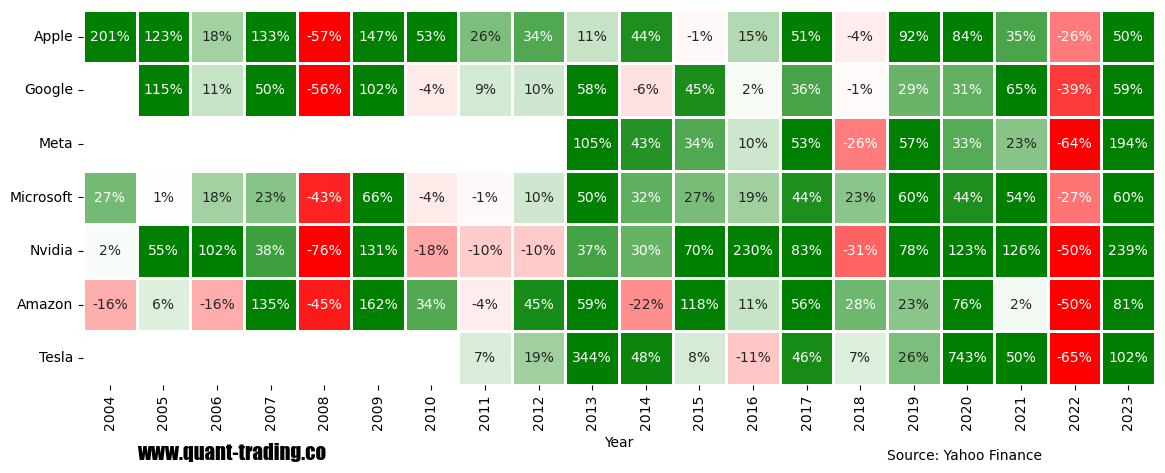

In [29]:
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)   #you can define your own colors

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(vmin=-0.5,vmax=0.5,data = df_all[alias].tail(20).transpose(), annot = True, fmt='2.0%',cmap = cmap,annot_kws={'size':10},cbar=False, square=True,linewidth=0.75)
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
ax.set_facecolor('white') 

plt.text(15, len(tickers)*1.2,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(1, len(tickers)*1.2,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)